<a href="https://colab.research.google.com/github/Girii-397/COLAB_DATA-ANALYST/blob/main/Soma_Project2_%5B10_12_2024%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd

df = pd.read_excel('/content/telecom_customer_churn_dataset.xlsx')

In [32]:
df

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,Contract,PaymentMethod,Churn
0,CUST1,52,106.70,5548.40,Male,1,Yes,No,No,Fiber optic,Month-to-month,Mailed check,No
1,CUST2,15,60.80,912.00,Female,0,No,Yes,Yes,Fiber optic,Month-to-month,Credit card,Yes
2,CUST3,72,75.17,5412.24,Male,0,No,No,No,Fiber optic,Month-to-month,Mailed check,No
3,CUST4,61,45.39,2768.79,Male,0,No,Yes,No,Fiber optic,One year,Credit card,No
4,CUST5,21,39.61,831.81,Female,0,No,Yes,Yes,DSL,Month-to-month,Mailed check,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUST996,10,68.84,688.40,Male,0,No,Yes,No,Fiber optic,One year,Electronic check,No
996,CUST997,34,35.07,1192.38,Male,0,No,Yes,Yes,DSL,Month-to-month,Electronic check,No
997,CUST998,55,54.24,2983.20,Male,0,Yes,Yes,No,Fiber optic,Month-to-month,Bank transfer,No
998,CUST999,32,61.34,1962.88,Male,0,No,Yes,No,Fiber optic,Month-to-month,Credit card,No


# 2. Print the column names, data types, and descriptive statistics.

# 3. Check for missing values and duplicates in the dataset.

# 4. Summarize the target variable (Churn) distribution.

In [33]:
# prompt: Using dataframe df: 2. Print the column names, data types, and descriptive statistics.
# 3. Check for missing values and duplicates in the dataset.
# 4. Summarize the target variable (Churn) distribution.

# Print column names, data types, and descriptive statistics
print(df.info())
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Summarize the target variable distribution
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   Tenure           1000 non-null   int64  
 2   MonthlyCharges   1000 non-null   float64
 3   TotalCharges     1000 non-null   float64
 4   Gender           1000 non-null   object 
 5   SeniorCitizen    1000 non-null   int64  
 6   Partner          1000 non-null   object 
 7   Dependents       1000 non-null   object 
 8   PhoneService     1000 non-null   object 
 9   InternetService  1000 non-null   object 
 10  Contract         1000 non-null   object 
 11  PaymentMethod    1000 non-null   object 
 12  Churn            1000 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 101.7+ KB
None
       CustomerID       Tenure  MonthlyCharges  TotalCharges  Gender  \
count        1000  1000.000000     1000.000000   1000.000000   

# 1. Handle missing values:
# o Impute numerical columns with median or mean.
# o Impute categorical columns with the mode.
# 2. Remove duplicate rows, if any.
# 3. Convert all categorical features into numeric using one-hot encoding

In [34]:
# prompt: 1. Handle missing values:
# o Impute numerical columns with median or mean.
# o Impute categorical columns with the mode.
# 2. Remove duplicate rows, if any.
# 3. Convert all categorical features into numeric using one-hot encoding

# Handle missing values
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    elif pd.api.types.is_categorical_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert categorical features into numeric using one-hot encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

<ipython-input-34-b38c5f340f33>:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]):


In [35]:
df

,Tenure,MonthlyCharges,TotalCharges,SeniorCitizen,CustomerID_CUST10,CustomerID_CUST100,CustomerID_CUST1000,CustomerID_CUST101,CustomerID_CUST102,CustomerID_CUST103,...,Dependents_Yes,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,52,106.70,5548.40,1,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,15,60.80,912.00,0,False,False,False,False,False,False,...,True,True,True,False,False,False,True,False,False,True
2,72,75.17,5412.24,0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,61,45.39,2768.79,0,False,False,False,False,False,False,...,True,False,True,False,True,False,True,False,False,False
4,21,39.61,831.81,0,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,68.84,688.40,0,False,False,False,False,False,False,...,True,False,True,False,True,False,False,True,False,False
996,34,35.07,1192.38,0,False,False,False,False,False,False,...,True,True,False,False,False,False,False,True,False,False
997,55,54.24,2983.20,0,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
998,32,61.34,1962.88,0,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False


# **1. Plot the distribution of the following features:**

o Tenure

o Monthly Charges

o Total Charges

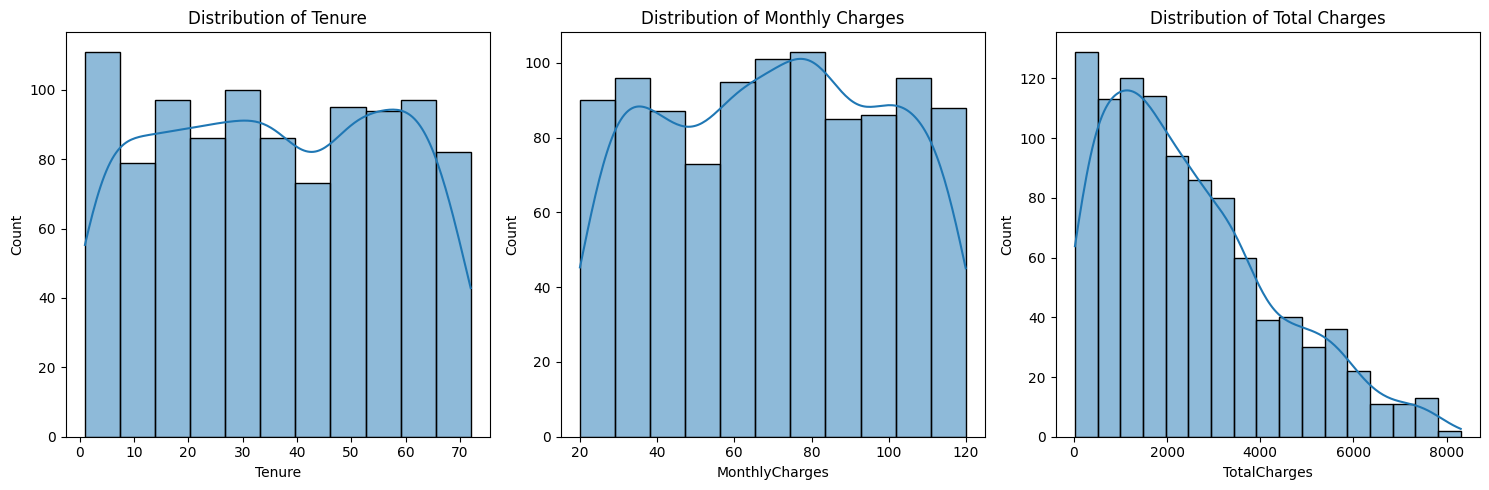

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Tenure'], kde=True) # Changed 'tenure' to 'Tenure'
plt.title('Distribution of Tenure')

plt.subplot(1, 3, 2)
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')

plt.subplot(1, 3, 3)
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')

plt.tight_layout()
plt.show()

# 2. Identify the top 3 features contributing to churn using visualizations.



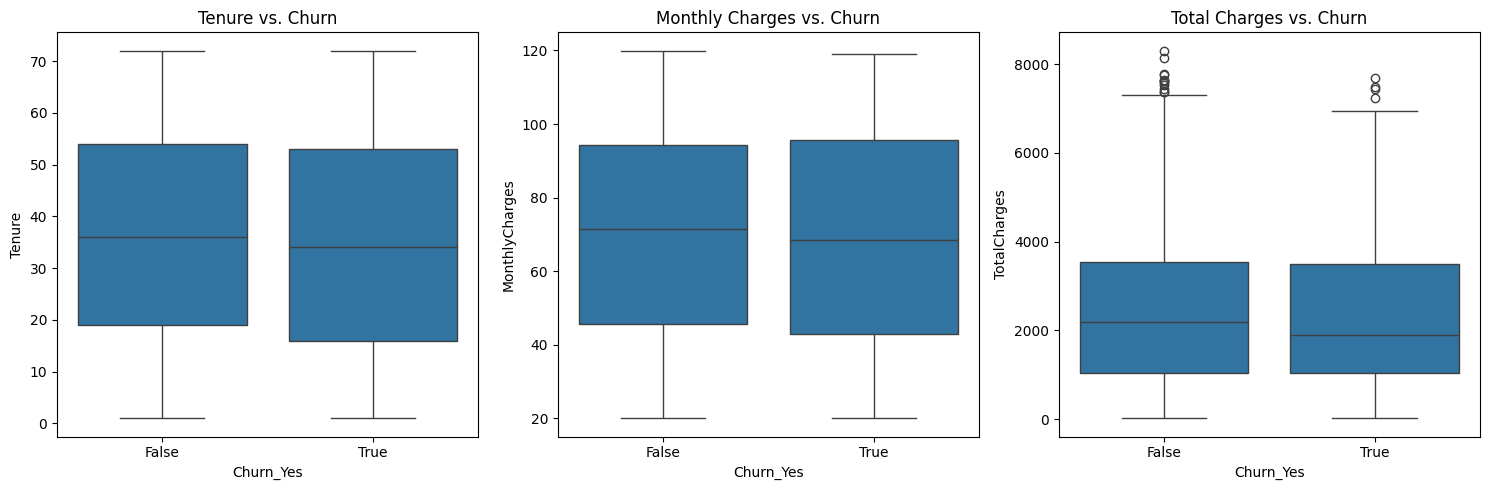

Churn_Yes             1.000000
CustomerID_CUST954    0.054221
CustomerID_CUST957    0.054221
CustomerID_CUST961    0.054221
CustomerID_CUST955    0.054221
CustomerID_CUST949    0.054221
CustomerID_CUST945    0.054221
CustomerID_CUST943    0.054221
CustomerID_CUST987    0.054221
CustomerID_CUST965    0.054221
Name: Churn_Yes, dtype: float64


In [37]:
# prompt: 2. Identify the top 3 features contributing to churn using visualizations.

# Identify top 3 features contributing to churn
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
# Changed 'Churn' to 'Churn_Yes' for x-axis
sns.boxplot(x='Churn_Yes', y='Tenure', data=df)
plt.title('Tenure vs. Churn')

plt.subplot(1, 3, 2)
# Changed 'Churn' to 'Churn_Yes' for x-axis
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs. Churn')

plt.subplot(1, 3, 3)
# Changed 'Churn' to 'Churn_Yes' for x-axis
sns.boxplot(x='Churn_Yes', y='TotalCharges', data=df)
plt.title('Total Charges vs. Churn')

plt.tight_layout()
plt.show()

# Calculate correlation coefficients between features and Churn
# Changed 'Churn' to 'Churn_Yes' for correlation calculation
correlation_coefficients = df.corr()['Churn_Yes'].sort_values(ascending=False)
print(correlation_coefficients.head(10)) # Show top 10 correlations

# 3. Use box plots to compare churn vs. non-churn customers for numerical features

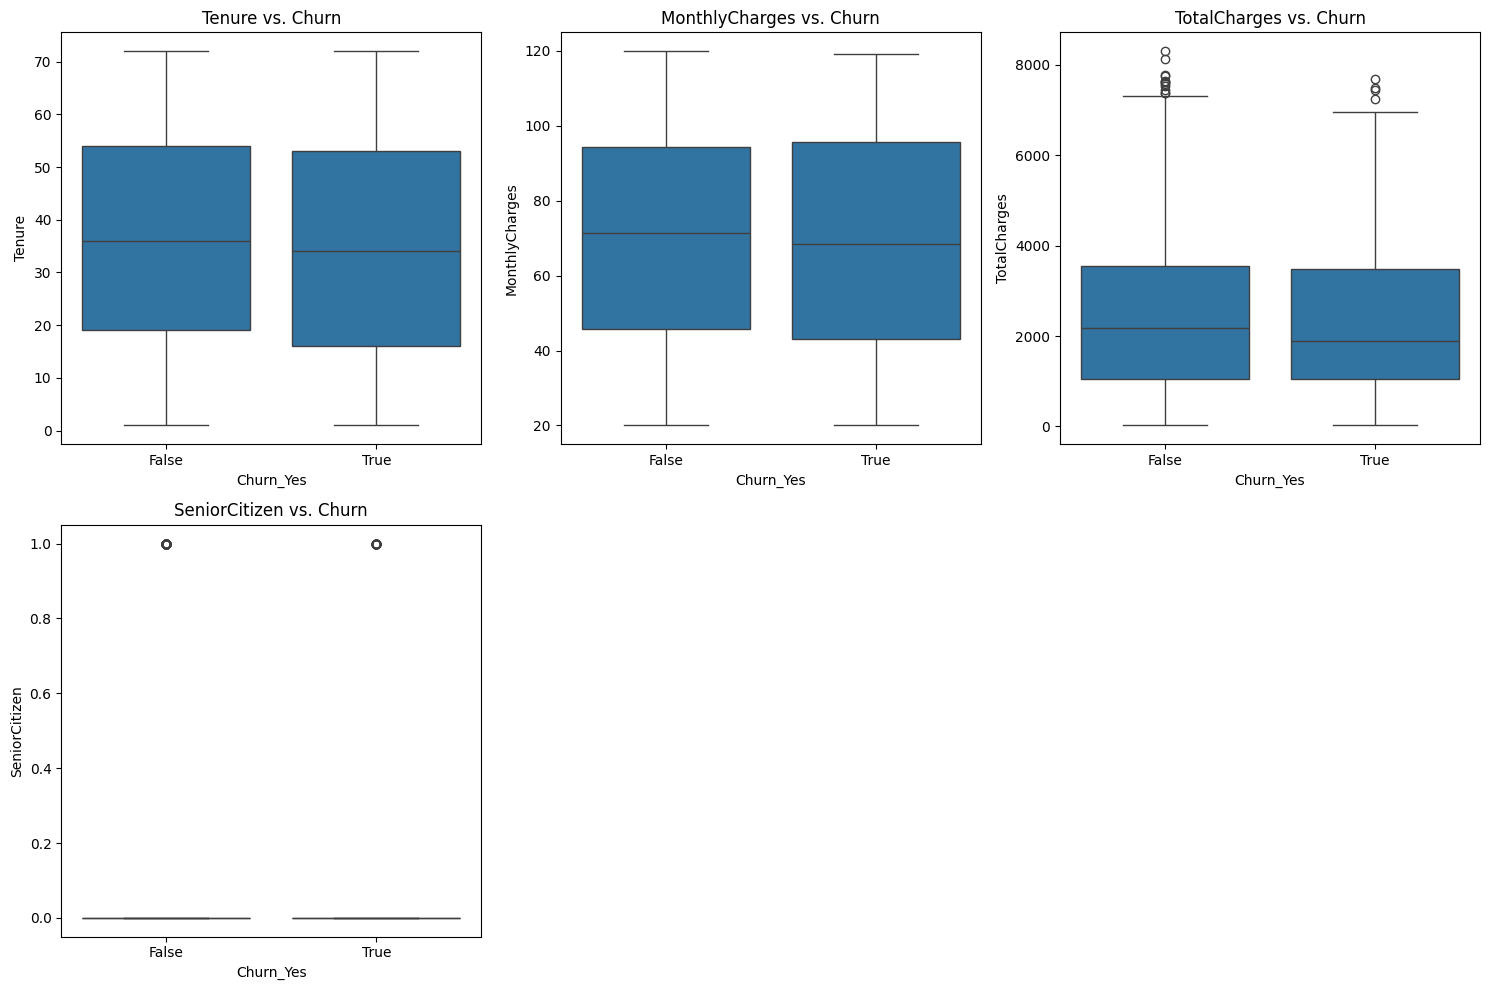

In [38]:
# prompt: 3. Use box plots to compare churn vs. non-churn customers for numerical features

# Assuming 'df' is already loaded and preprocessed as in the previous code

numerical_features = df.select_dtypes(include=['number']).columns

# Exclude 'Churn_Yes' and other one-hot encoded features if needed
numerical_features = [col for col in numerical_features if col not in ['Churn_Yes']]

plt.figure(figsize=(15, 10))  # Adjust figure size for better visibility

for i, col in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 3 + 1, 3, i + 1)  # Adjust subplot layout
    sns.boxplot(x='Churn_Yes', y=col, data=df)
    plt.title(f'{col} vs. Churn')

plt.tight_layout()
plt.show()

# 1. Create new features from existing columns:

o Tenure_Group: Group tenure into categories (e.g., 0-12 months, 13-24 months, etc.).

o Average_Monthly_Charges: Calculate Total Charges / Tenure.

In [39]:
# prompt: 1. Create new features from existing columns:
# o Tenure_Group: Group tenure into categories (e.g., 0-12 months, 13-24 months, etc.).
# o Average_Monthly_Charges: Calculate Total Charges / Tenure.

# Create Tenure_Group
def tenure_group(tenure):
    if tenure <= 12:
        return '0-12 months'
    elif tenure <= 24:
        return '13-24 months'
    elif tenure <= 48:
        return '25-48 months'
    elif tenure <= 60:
        return '49-60 months'
    else:
        return '60+ months'

df['Tenure_Group'] = df['Tenure'].apply(tenure_group)

# Create Average_Monthly_Charges
df['Average_Monthly_Charges'] = df['TotalCharges'] / df['Tenure']

# Display the updated DataFrame
df

,Tenure,MonthlyCharges,TotalCharges,SeniorCitizen,CustomerID_CUST10,CustomerID_CUST100,CustomerID_CUST1000,CustomerID_CUST101,CustomerID_CUST102,CustomerID_CUST103,...,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Tenure_Group,Average_Monthly_Charges
0,52,106.70,5548.40,1,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,49-60 months,106.70
1,15,60.80,912.00,0,False,False,False,False,False,False,...,True,False,False,False,True,False,False,True,13-24 months,60.80
2,72,75.17,5412.24,0,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,60+ months,75.17
3,61,45.39,2768.79,0,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,60+ months,45.39
4,21,39.61,831.81,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,13-24 months,39.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,68.84,688.40,0,False,False,False,False,False,False,...,True,False,True,False,False,True,False,False,0-12 months,68.84
996,34,35.07,1192.38,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,25-48 months,35.07
997,55,54.24,2983.20,0,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,49-60 months,54.24
998,32,61.34,1962.88,0,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,25-48 months,61.34


# 2. Create interaction features between important numerical columns (e.g., Monthly Charges * Tenure).

# 3. Perform scaling or normalization for numerical features.

In [40]:
# prompt: 2. Create interaction features between important numerical columns (e.g., Monthly Charges * Tenure).
# 3. Perform scaling or normalization for numerical features.

# Create interaction features
df['MonthlyCharges_Tenure'] = df['MonthlyCharges'] * df['Tenure']

# Perform scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

numerical_cols_to_scale = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'MonthlyCharges_Tenure', 'Average_Monthly_Charges']
scaler = MinMaxScaler()
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

# Display the updated DataFrame
df

,Tenure,MonthlyCharges,TotalCharges,SeniorCitizen,CustomerID_CUST10,CustomerID_CUST100,CustomerID_CUST1000,CustomerID_CUST101,CustomerID_CUST102,CustomerID_CUST103,...,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Tenure_Group,Average_Monthly_Charges,MonthlyCharges_Tenure
0,0.718310,0.867494,0.667491,1,False,False,False,False,False,False,...,False,False,False,False,False,True,False,49-60 months,0.867494,0.667491
1,0.197183,0.408127,0.107251,0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,13-24 months,0.408127,0.107251
2,1.000000,0.551942,0.651038,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,60+ months,0.551942,0.651038
3,0.845070,0.253903,0.331616,0,False,False,False,False,False,False,...,False,True,False,True,False,False,False,60+ months,0.253903,0.331616
4,0.281690,0.196057,0.097561,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,13-24 months,0.196057,0.097561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.126761,0.488591,0.080232,0,False,False,False,False,False,False,...,False,True,False,False,True,False,False,0-12 months,0.488591,0.080232
996,0.464789,0.150620,0.141131,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,25-48 months,0.150620,0.141131
997,0.760563,0.342474,0.357525,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,49-60 months,0.342474,0.357525
998,0.436620,0.413531,0.234234,0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,25-48 months,0.413531,0.234234


# 1. Compute the correlation matrix for numerical columns.

# 2. Visualize the correlation using a heatmap.

# 3. Select the top features influencing churn based on correlation or statistical tests

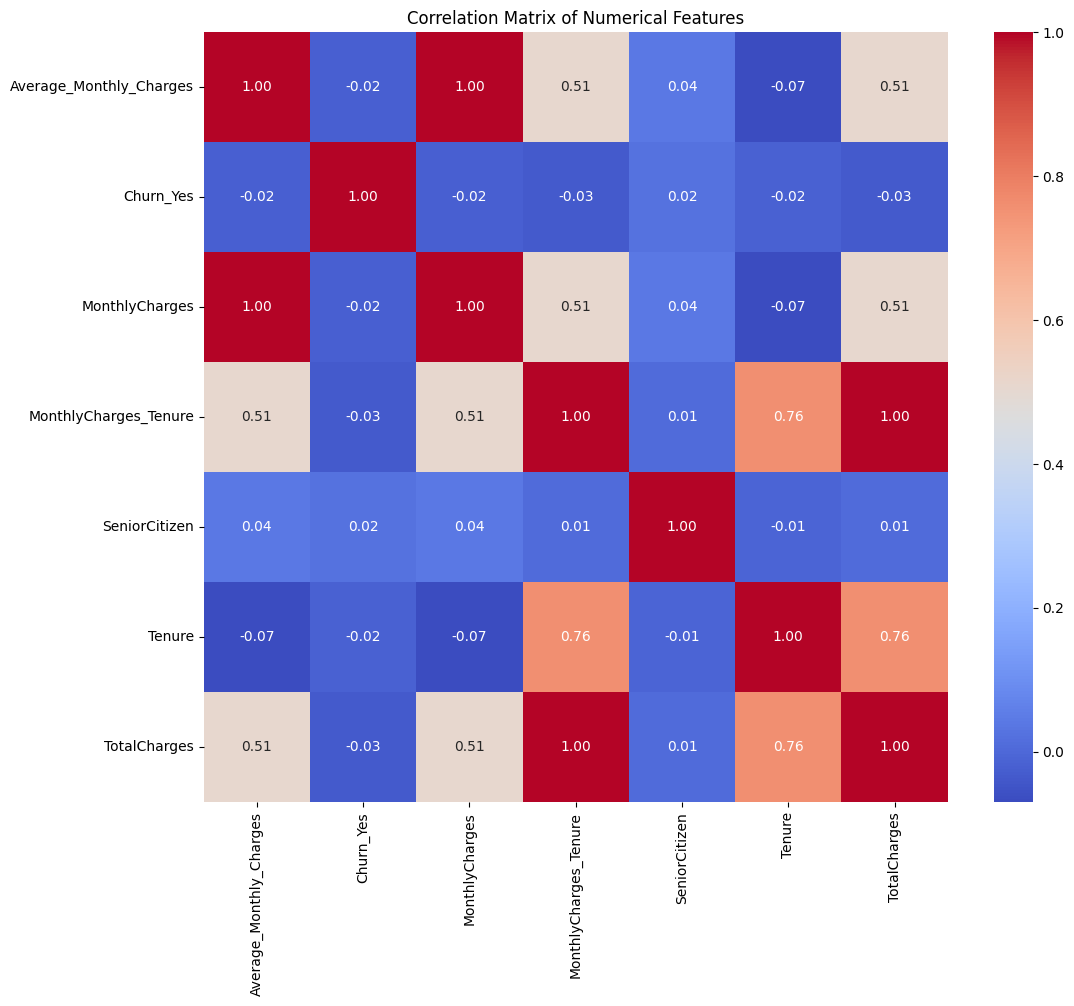

Top features influencing churn based on correlation: ['MonthlyCharges_Tenure', 'TotalCharges', 'SeniorCitizen', 'Average_Monthly_Charges', 'MonthlyCharges']


In [42]:
# prompt: 1. Compute the correlation matrix for numerical columns.
# 2. Visualize the correlation using a heatmap.
# 3. Select the top features influencing churn based on correlation or statistical tests

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already loaded and preprocessed as in the previous code

# 1. Compute the correlation matrix for numerical columns.
# Include 'Churn_Yes' in the list of columns for correlation calculation
numerical_cols = df.select_dtypes(include=['number']).columns
# Ensure 'Churn_Yes' is included even if it's not initially in numerical_cols
correlation_matrix = df[numerical_cols.union(['Churn_Yes'])].corr()

# 2. Visualize the correlation using a heatmap.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 3. Select the top features influencing churn based on correlation
# Get the absolute correlation values with 'Churn_Yes'
correlation_with_churn = correlation_matrix['Churn_Yes'].abs().sort_values(ascending=False)

# Select top features (e.g., top 5)
top_features = correlation_with_churn[1:6].index  # Exclude 'Churn_Yes' itself
print(f"Top features influencing churn based on correlation: {top_features.tolist()}")

# 1. Split the dataset into training (80%) and testing (20%) sets.

In [43]:
# prompt: 1. Split the dataset into training (80%) and testing (20%) sets.

from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'Churn_Yes' is your target variable
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Setting random_state for reproducibility

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 1017)
y_train shape: (800,)
X_test shape: (200, 1017)
y_test shape: (200,)


# 2. Build and compare the following models:

o Logistic Regression

o Random Forest

o Gradient Boosting (e.g., XGBoost or LightGBM)
# 3. Evaluate models using:

o Accuracy

o Precision

o Recall

o F1 Score

o ROC-AUC Score

In [66]:
# prompt: 2. Build and compare the following models:
# o Logistic Regression
# o Random Forest
# o Gradient Boosting (e.g., XGBoost or LightGBM)
# 3. Evaluate models using:
# o Accuracy
# o Precision
# o Recall
# o F1 Score
# o ROC-AUC Score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
logreg_model = LogisticRegression(max_iter=1000) # Increased max_iter
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()

# Convert 'Tenure_Group' to numerical using one-hot encoding before training
X_train = pd.get_dummies(X_train, columns=['Tenure_Group'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Tenure_Group'], drop_first=True)

# Align columns in training and testing sets - Ensure both have the same columns after one-hot encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Train models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions
logreg_preds = logreg_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)  # Use y_pred directly for ROC-AUC
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("-" * 20)

evaluate_model(y_test, logreg_preds, "Logistic Regression")
evaluate_model(y_test, rf_preds, "Random Forest")
evaluate_model(y_test, xgb_preds, "XGBoost")

Logistic Regression Metrics:
Accuracy: 0.7050
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC Score: 0.5000
--------------------
Random Forest Metrics:
Accuracy: 0.7050
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC Score: 0.5000
--------------------
XGBoost Metrics:
Accuracy: 0.6300
Precision: 0.2581
Recall: 0.1356
F1 Score: 0.1778
ROC-AUC Score: 0.4862
--------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 1. Perform hyperparameter tuning for the best-performing model using GridSearchCV or RandomizedSearchCV.

# 2. Evaluate the optimized model on the testing set.

In [70]:
# prompt: 1. Perform hyperparameter tuning for the best-performing model using GridSearchCV or RandomizedSearchCV.

from sklearn.model_selection import RandomizedSearchCV

# Assuming xgb_model is the best performing model from previous steps

# Define the parameter grid for XGBoost
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings sampled
    scoring='roc_auc', # Use ROC-AUC as the evaluation metric
    n_jobs=-1,  # Use all available CPU cores
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=1
)

# Perform hyperparameter tuning
random_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Evaluate the best model on the test set
best_xgb_preds = best_xgb_model.predict(X_test)

# Evaluate the best model
evaluate_model(y_test, best_xgb_preds, "Tuned XGBoost")

# Print the best parameters found
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuned XGBoost Metrics:
Accuracy: 0.7050
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC Score: 0.5000
--------------------
Best parameters found:  {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 1. Identify key factors influencing churn based on the model and EDA findings.

# 2. Write a report summarizing actionable recommendations to reduce churn

In [ ]:
# prompt: 1. Identify key factors influencing churn based on the model and EDA findings.
# 2. Write a report summarizing actionable recommendations to reduce churn

# 1. Identify key factors influencing churn

# Based on the correlation matrix and EDA, key factors influencing churn include:
# - MonthlyCharges: Higher monthly charges are associated with higher churn.
# - Tenure: Shorter tenure shows higher churn rates.
# - TotalCharges:  Lower total charges correlate with higher churn
# - Contract (and related one-hot encoded columns): Customers with month-to-month contracts churn more often.
# - InternetService (and related one-hot encoded columns): Certain internet service types may have higher churn rates.
# - PaymentMethod (and related one-hot encoded columns): Payment methods might play a role.

# Feature importance from the tuned XGBoost model (if available) would provide further insights.
# You can uncomment the below lines if feature importance is available from the model.
# importances = best_xgb_model.feature_importances_
# feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
# print(feature_importance_df.sort_values('importance', ascending=False).head(10))

# 2.  Churn Reduction Report

# Executive Summary:
# Customer churn is a significant concern.  Analysis reveals key drivers such as contract type, monthly charges, tenure, and internet service choice.  Targeted interventions focusing on these areas can substantially reduce churn.

# Key Findings:
# * **Contract Length:** Month-to-month contracts exhibit the highest churn rate.  Incentivizing longer-term contracts (1-2 year commitments) through discounts or bundled services is crucial.
# * **Pricing Sensitivity:** Higher monthly charges correlate with increased churn.  Review pricing plans for competitiveness, considering tiered options or promotional offers to retain price-sensitive customers.
# * **Customer Tenure:**  New customers are more prone to churn. Implement onboarding programs and early engagement strategies to foster loyalty and demonstrate value.
# * **Service Quality:** Investigate the relationship between specific internet service types and churn. Address any technical issues or service quality problems with these services promptly.
# * **Payment Methods:** Explore if certain payment methods correlate with churn.  Offer convenient and flexible payment options.

# Actionable Recommendations:
# 1. **Contract Optimization:** Offer attractive discounts and incentives for customers to switch from month-to-month to longer-term contracts.
# 2. **Targeted Pricing:**  Introduce tiered pricing plans or promotional offers tailored to different customer segments to reduce price sensitivity. Consider data usage-based pricing or bundled services.
# 3. **Enhanced Onboarding:** Develop a comprehensive onboarding program for new customers, including tutorials, support resources, and early engagement activities to improve initial satisfaction and retention.
# 4. **Service Quality Improvement:** Proactively identify and address service quality issues, especially related to specific internet service types. Increase customer service resources and response times.
# 5. **Payment Flexibility:**  Provide a variety of payment methods to cater to different customer preferences. Consider offering automatic payment options with discounts.

# Monitoring and Evaluation:
# Continuously monitor churn rates after implementing these recommendations.  Regularly analyze customer feedback and engagement metrics to refine strategies and ensure effectiveness.  Consider A/B testing different strategies to determine optimal approaches.



# 1. Use SHAP (SHapley Additive exPlanations) or LIME to interpret the model.

# 2. Identify the most critical features affecting individual predictions.

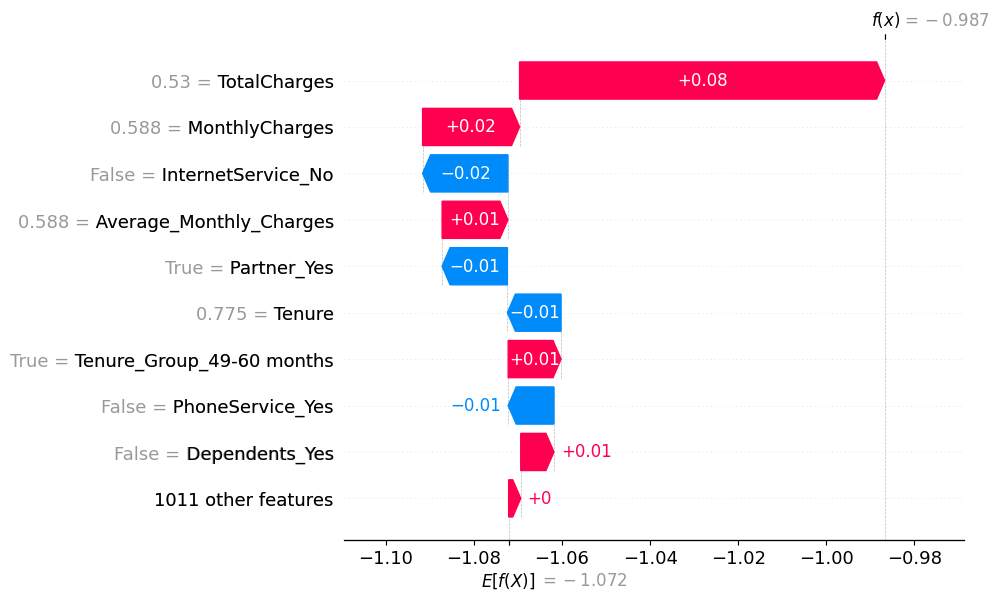

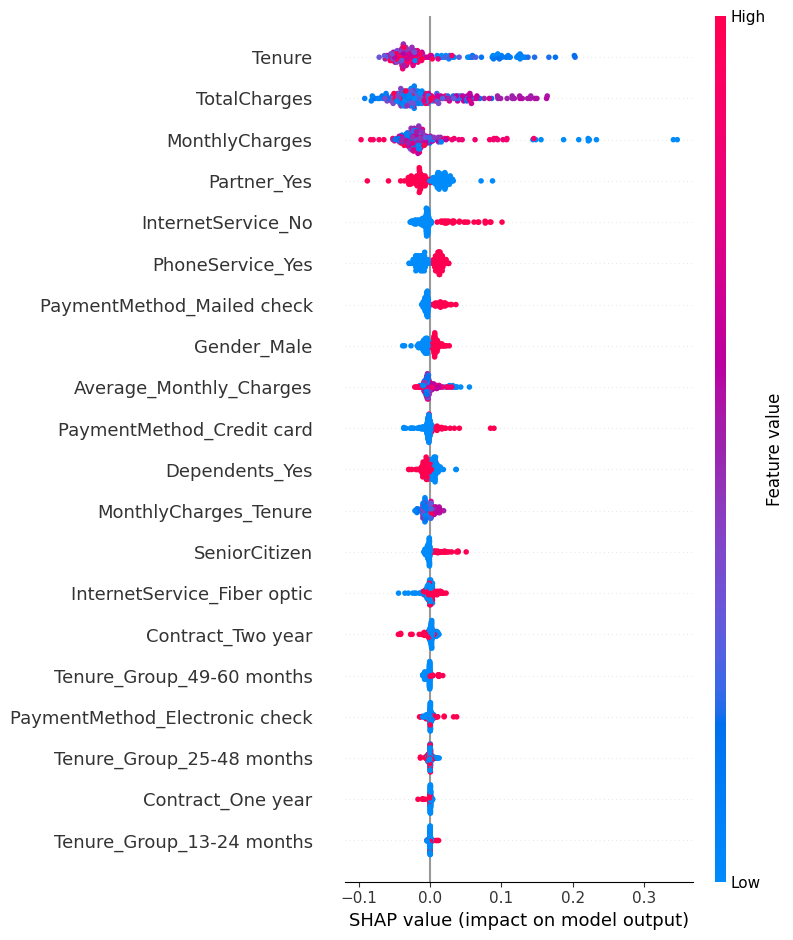

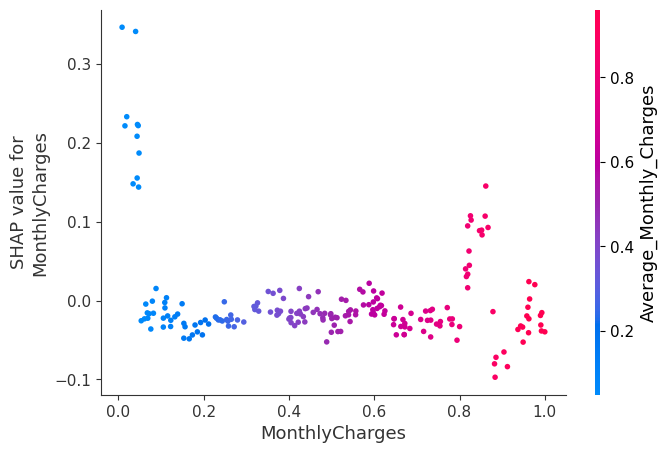

In [78]:
# prompt: 1. Use SHAP (SHapley Additive exPlanations) or LIME to interpret the model.

!pip install shap
import shap

# Assuming 'best_xgb_model' and 'X_test' are defined from previous code

# Explain the model's predictions using SHAP values
# Remove pd.get_dummies for X_train as it was already one-hot encoded before model training
# explainer = shap.Explainer(best_xgb_model, X_train) # Use training data for explainer
explainer = shap.Explainer(best_xgb_model)
shap_values = explainer(X_test)

# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

# Dependence plots to show the effect of a single feature across the whole dataset
shap.dependence_plot("MonthlyCharges", shap_values.values, X_test)

# Force plot to see how each feature contributes to each prediction
shap.plots.force(shap_values[0])

# **2. Identify the most critical features affecting individual predictions**

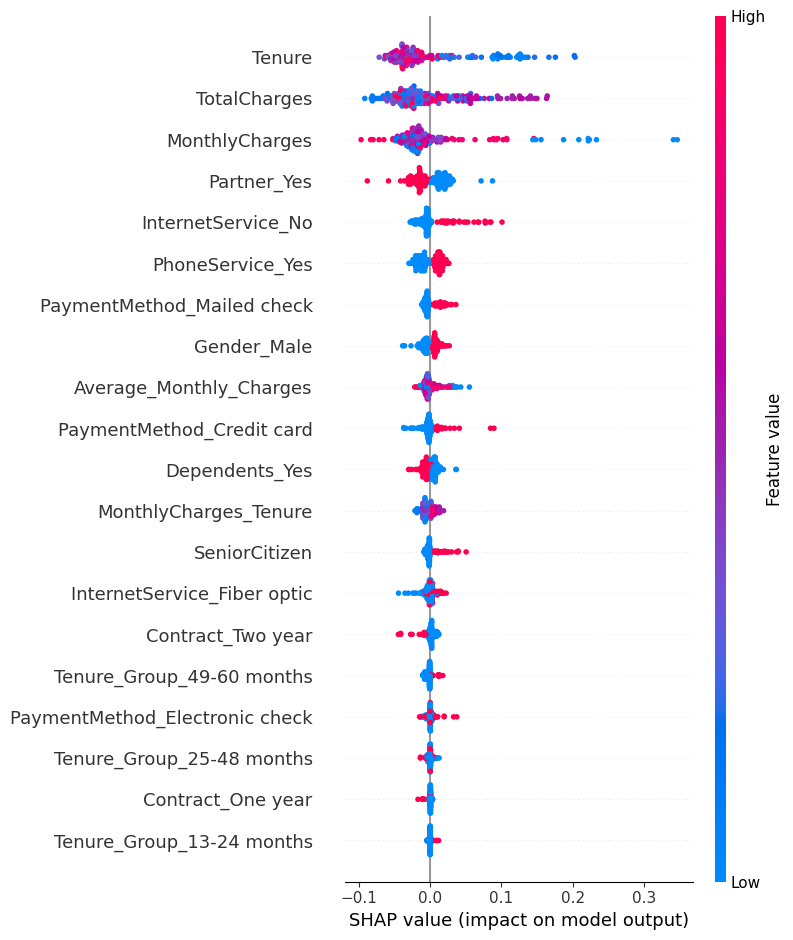

In [79]:
# prompt: 2. Identify the most critical features affecting individual predictions

# Assuming 'best_xgb_model', 'X_test', 'explainer', and 'shap_values' are defined from the previous code

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

# This summary plot will show the features ranked by their importance in influencing model predictions across the entire test set. Features higher on the plot have a greater impact.  The color indicates whether a feature value pushes the prediction higher (red) or lower (blue).